In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv(r'StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.shape

(6607, 20)

In [4]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [5]:
print(df.duplicated().sum())

0


In [6]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
df.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

In [8]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [9]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [10]:
#Check categories in each columns
print("Categories in 'Hours_Studied' variable:     ", end=" ")
print(df['Hours_Studied'].unique())

print("Categories in 'Parental_Involvement' variable:  ", end=" ")
print(df['Parental_Involvement'].unique())

print("Categories in 'Extracurricular_Activities' variable:", end=" ")
print(df['Extracurricular_Activities'].unique())

print("Categories in 'Sleep_Hours' variable:", end=" ")
print(df['Sleep_Hours'].unique())

print("Categories in 'Teacher Quality' variable:     ", end=" ")
print(df['Teacher_Quality'].unique())

print("Categories in 'Access To Resources' variable:     ", end=" ")
print(df['Access_to_Resources'].unique())

print("Categories in 'School_Type' variable:", end=" ")
print(df['School_Type'].unique())

print("Categories in 'Physical_Activity'' variable:     ", end=" ")
print(df['Physical_Activity'].unique())

print("Categories in 'Distance_from_Home' variable:     ", end=" ")
print(df['Distance_from_Home'].unique())

Categories in 'Hours_Studied' variable:      [23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3  2 39 37 44]
Categories in 'Parental_Involvement' variable:   ['Low' 'Medium' 'High']
Categories in 'Extracurricular_Activities' variable: ['No' 'Yes']
Categories in 'Sleep_Hours' variable: [ 7  8  6 10  9  5  4]
Categories in 'Teacher Quality' variable:      ['Medium' 'High' 'Low' nan]
Categories in 'Access To Resources' variable:      ['High' 'Medium' 'Low']
Categories in 'School_Type' variable: ['Public' 'Private']
Categories in 'Physical_Activity'' variable:      [3 4 2 1 5 0 6]
Categories in 'Distance_from_Home' variable:      ['Near' 'Moderate' 'Far' nan]


In [11]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

We have 13 categorical features : ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [12]:
# Define performance category function
def categorize_performance(score):
    if score >= 80:
        return 'Excellent'
    elif score >= 65:
        return 'Good'
    elif score >= 60:
        return 'Average'
    else:
        return 'Poor'

In [13]:
# Apply the function to add the Performance column
df['Performance'] = df['Exam_Score'].apply(categorize_performance)

In [14]:
print("Categories in 'Performance' variable:     ", end=" ")
print(df["Performance"].unique())

Categories in 'Performance' variable:      ['Good' 'Average' 'Excellent' 'Poor']


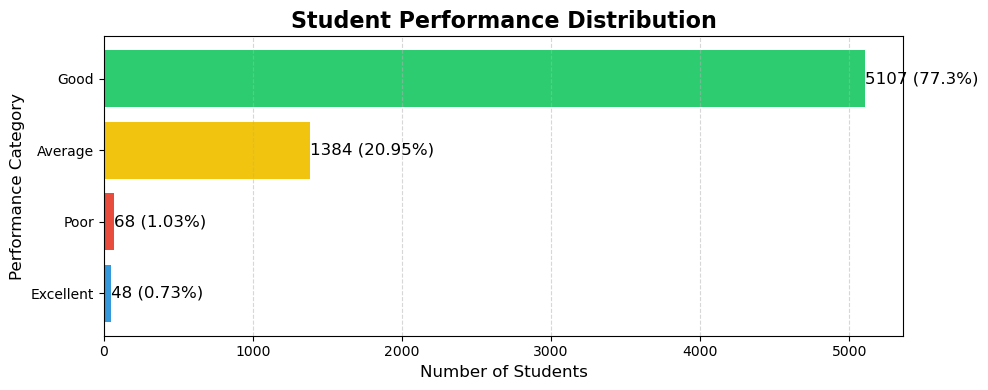

In [15]:
# Count performance categories
performance_counts = df['Performance'].value_counts().sort_values()
total = performance_counts.sum()
percentages = (performance_counts / total * 100).round(2)

# Custom bright color palette
colors = {
    'Poor': '#e74c3c',        # Bright Red
    'Average': '#f1c40f',     # Bright Yellow
    'Good': '#2ecc71',        # Bright Green
    'Excellent': '#3498db'    # Bright Blue
}

# Match colors to order
bar_colors = [colors[label] for label in performance_counts.index]

# Plot
plt.figure(figsize=(10, 4))
bars = plt.barh(performance_counts.index, performance_counts.values, color=bar_colors)

# Add count and % text on bars
for i, (value, percent) in enumerate(zip(performance_counts.values, percentages.values)):
    plt.text(value + 1, i, f'{value} ({percent}%)', va='center', fontsize=12)

# Style
plt.title("Student Performance Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Number of Students", fontsize=12)
plt.ylabel("Performance Category", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

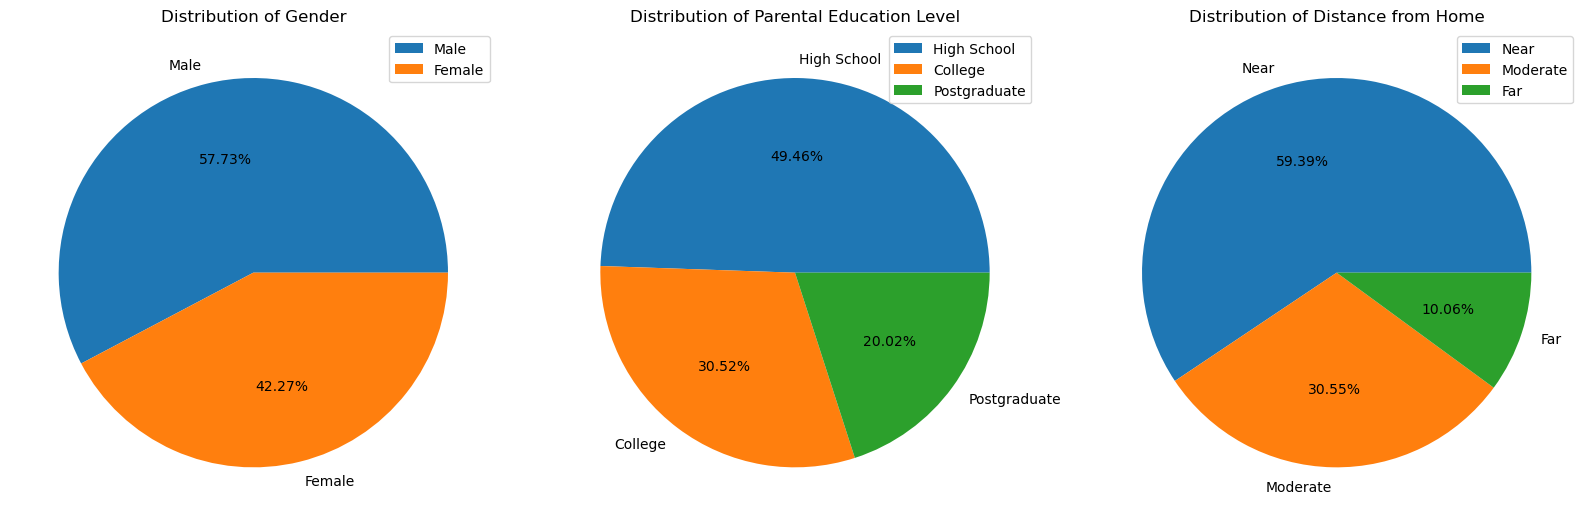

In [16]:

# Prepare count data for each categorical column
tdf = df['Gender'].value_counts().reset_index()
tdf.columns = ['Gender', 'count']

tdf1 = df['Parental_Education_Level'].value_counts().reset_index()
tdf1.columns = ['Parental_Education_Level', 'count']

tdf2 = df['Distance_from_Home'].value_counts().reset_index()
tdf2.columns = ['Distance_from_Home', 'count']

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# Gender Distribution
axs[0].set_title("Distribution of Gender")
axs[0].pie(x=tdf['count'], labels=tdf['Gender'], autopct='%.2f%%')
axs[0].legend(tdf['Gender'])

# Parental Education Level Distribution
axs[1].set_title("Distribution of Parental Education Level")
axs[1].pie(x=tdf1['count'], labels=tdf1['Parental_Education_Level'], autopct='%.2f%%')
axs[1].legend(tdf1['Parental_Education_Level'])

# Distance from Home Distribution
axs[2].set_title("Distribution of Distance from Home")
axs[2].pie(x=tdf2['count'], labels=tdf2['Distance_from_Home'], autopct='%.2f%%')
axs[2].legend(tdf2['Distance_from_Home'])

plt.tight_layout()
plt.show()

In [17]:
fill_values = {
    "Teacher_Quality": "Medium",
    "Parental_Education_Level": "High School",
    "Distance_from_Home": "Near"
}

df.fillna(fill_values, inplace=True)

In [18]:
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
Performance                   0
dtype: int64


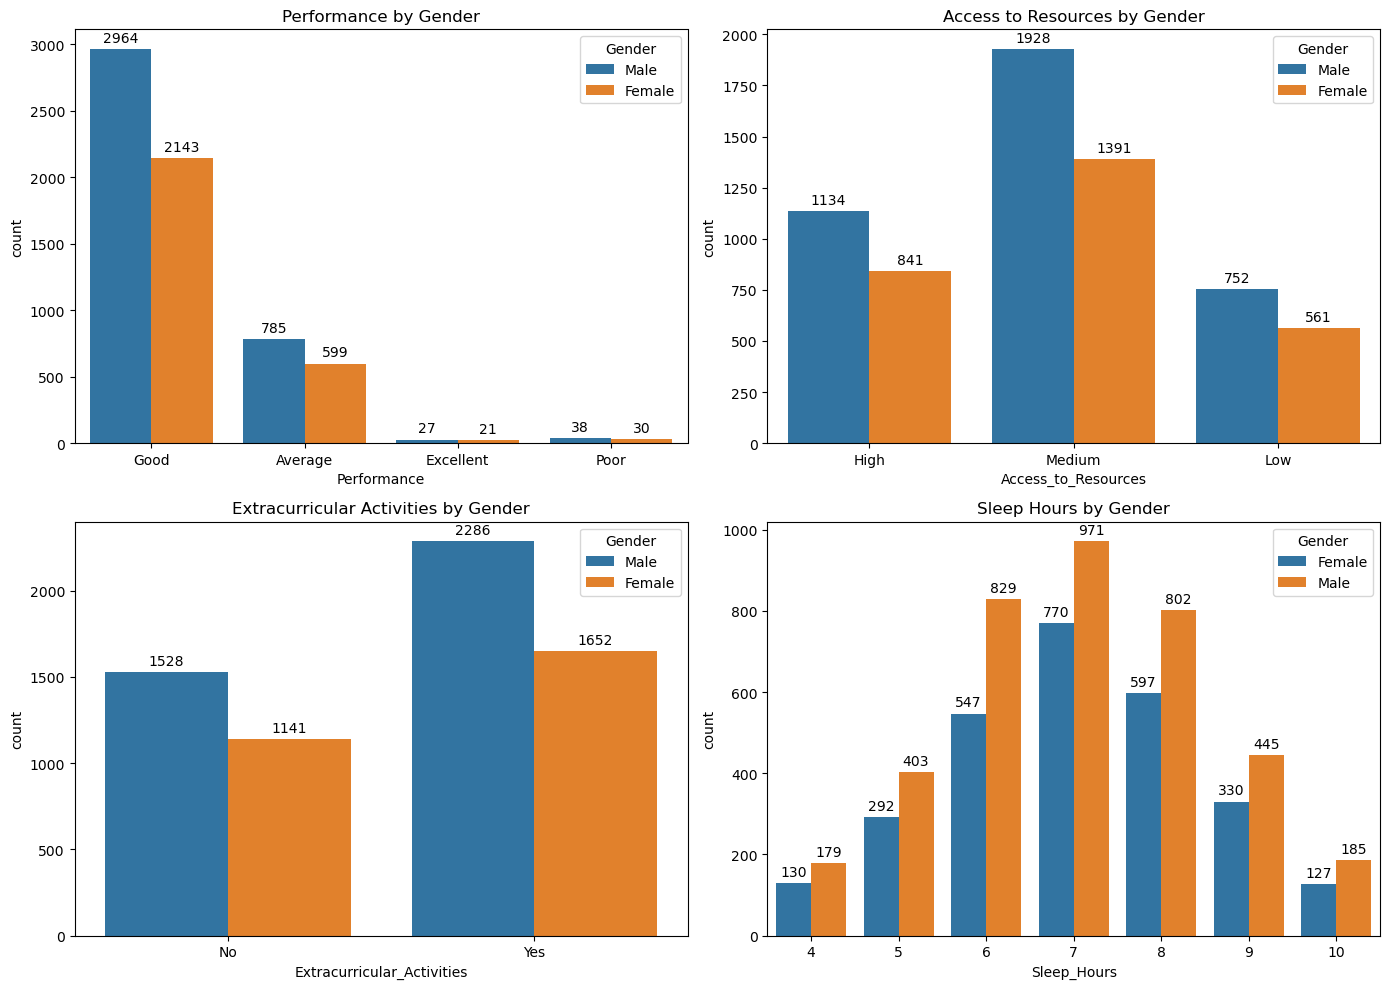

In [19]:
# Create 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Function to plot with labels
def countplot_with_labels(x, ax, title):
    plot = sns.countplot(x=x, hue='Gender', data=df, ax=ax)
    ax.set_title(title)

    # Loop through each container and label bars
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=3)

# Plot 1: Performance
countplot_with_labels('Performance', axs[0, 0], 'Performance by Gender')

# Plot 2: Access to Resources
countplot_with_labels('Access_to_Resources', axs[0, 1], 'Access to Resources by Gender')

# Plot 3: Extracurricular Activities
countplot_with_labels('Extracurricular_Activities', axs[1, 0], 'Extracurricular Activities by Gender')

# Plot 4: Sleep Hours
countplot_with_labels('Sleep_Hours', axs[1, 1], 'Sleep Hours by Gender')

plt.tight_layout()
plt.show()

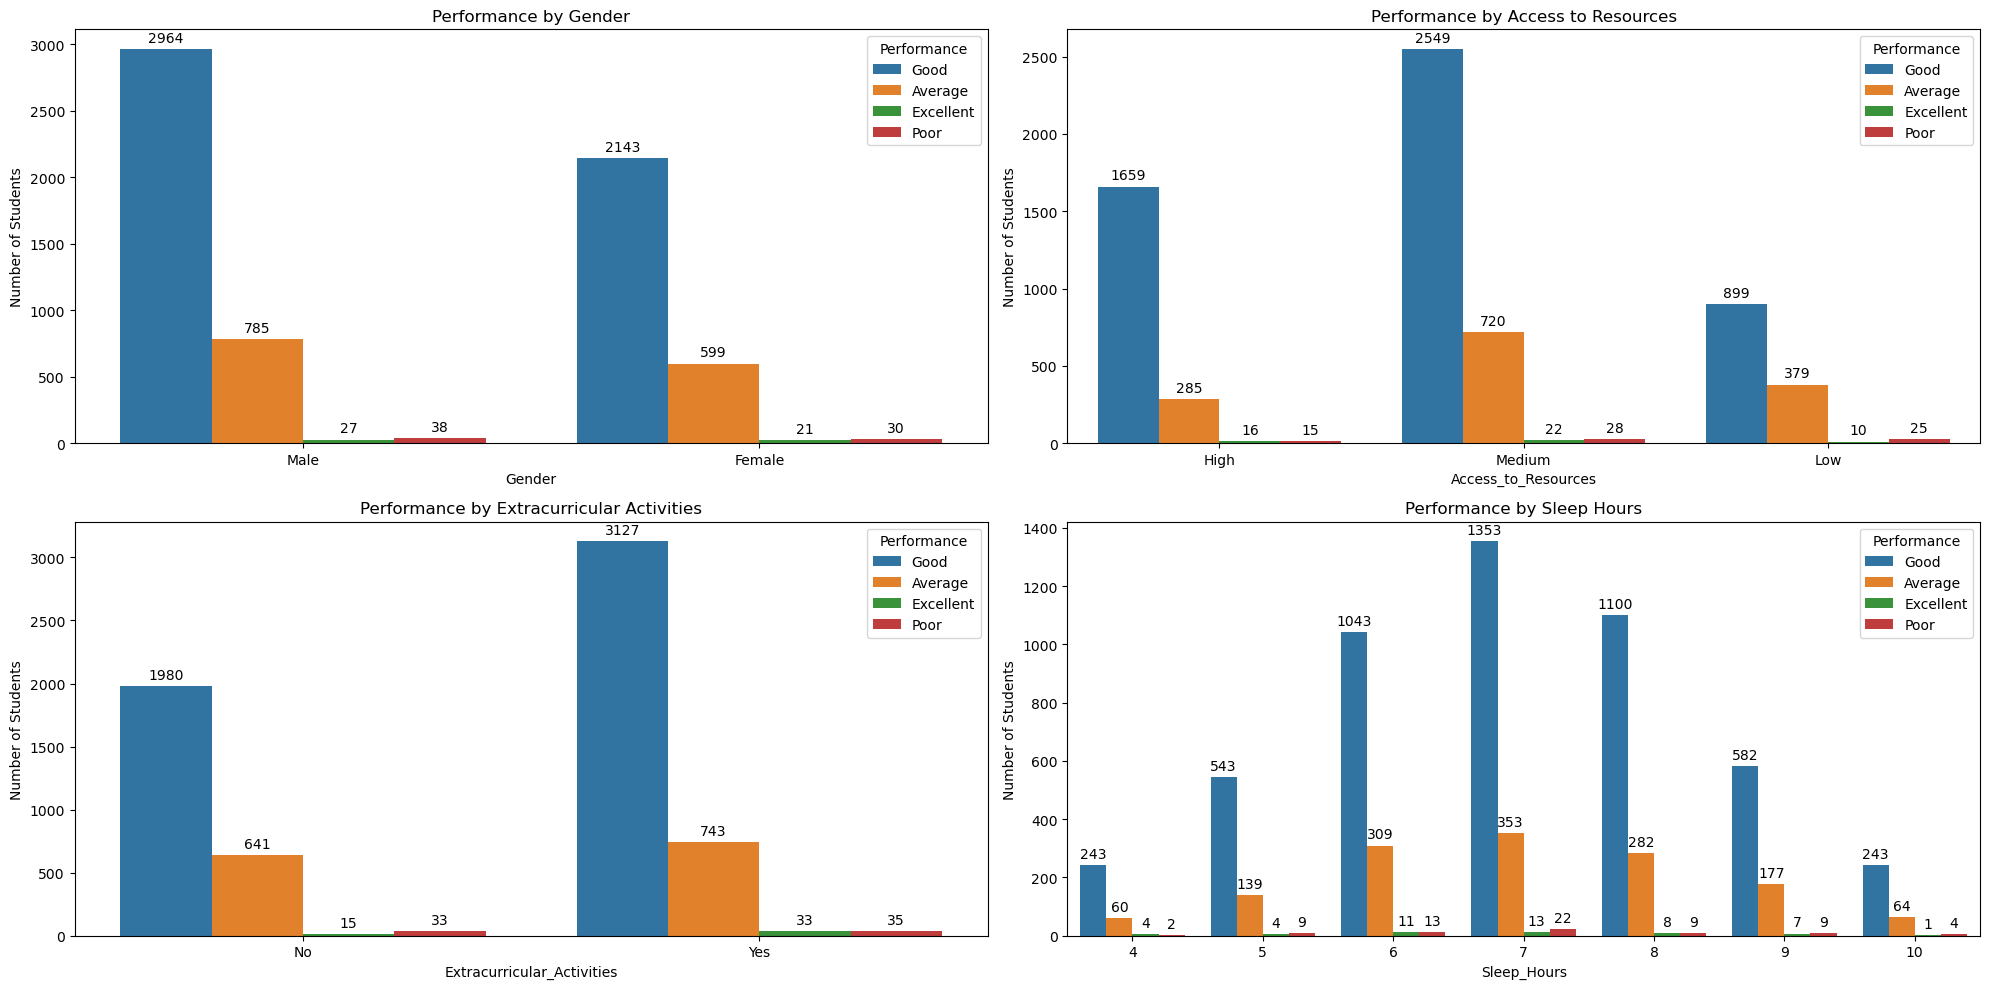

In [20]:

# Set up the 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Function to plot and label bars
def plot_by_feature(feature, ax, title):
    plot = sns.countplot(x=feature, hue='Performance', data=df, ax=ax)
    ax.set_title(title)
    ax.set_ylabel("Number of Students")
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=3)

# Plot 1: Gender vs Performance
plot_by_feature('Gender', axs[0, 0], 'Performance by Gender')

# Plot 2: Access to Resources vs Performance
plot_by_feature('Access_to_Resources', axs[0, 1], 'Performance by Access to Resources')

# Plot 3: Extracurricular Activities vs Performance
plot_by_feature('Extracurricular_Activities', axs[1, 0], 'Performance by Extracurricular Activities')

# Plot 4: Sleep Hours vs Performance
plot_by_feature('Sleep_Hours', axs[1, 1], 'Performance by Sleep Hours')

plt.tight_layout()
plt.show()

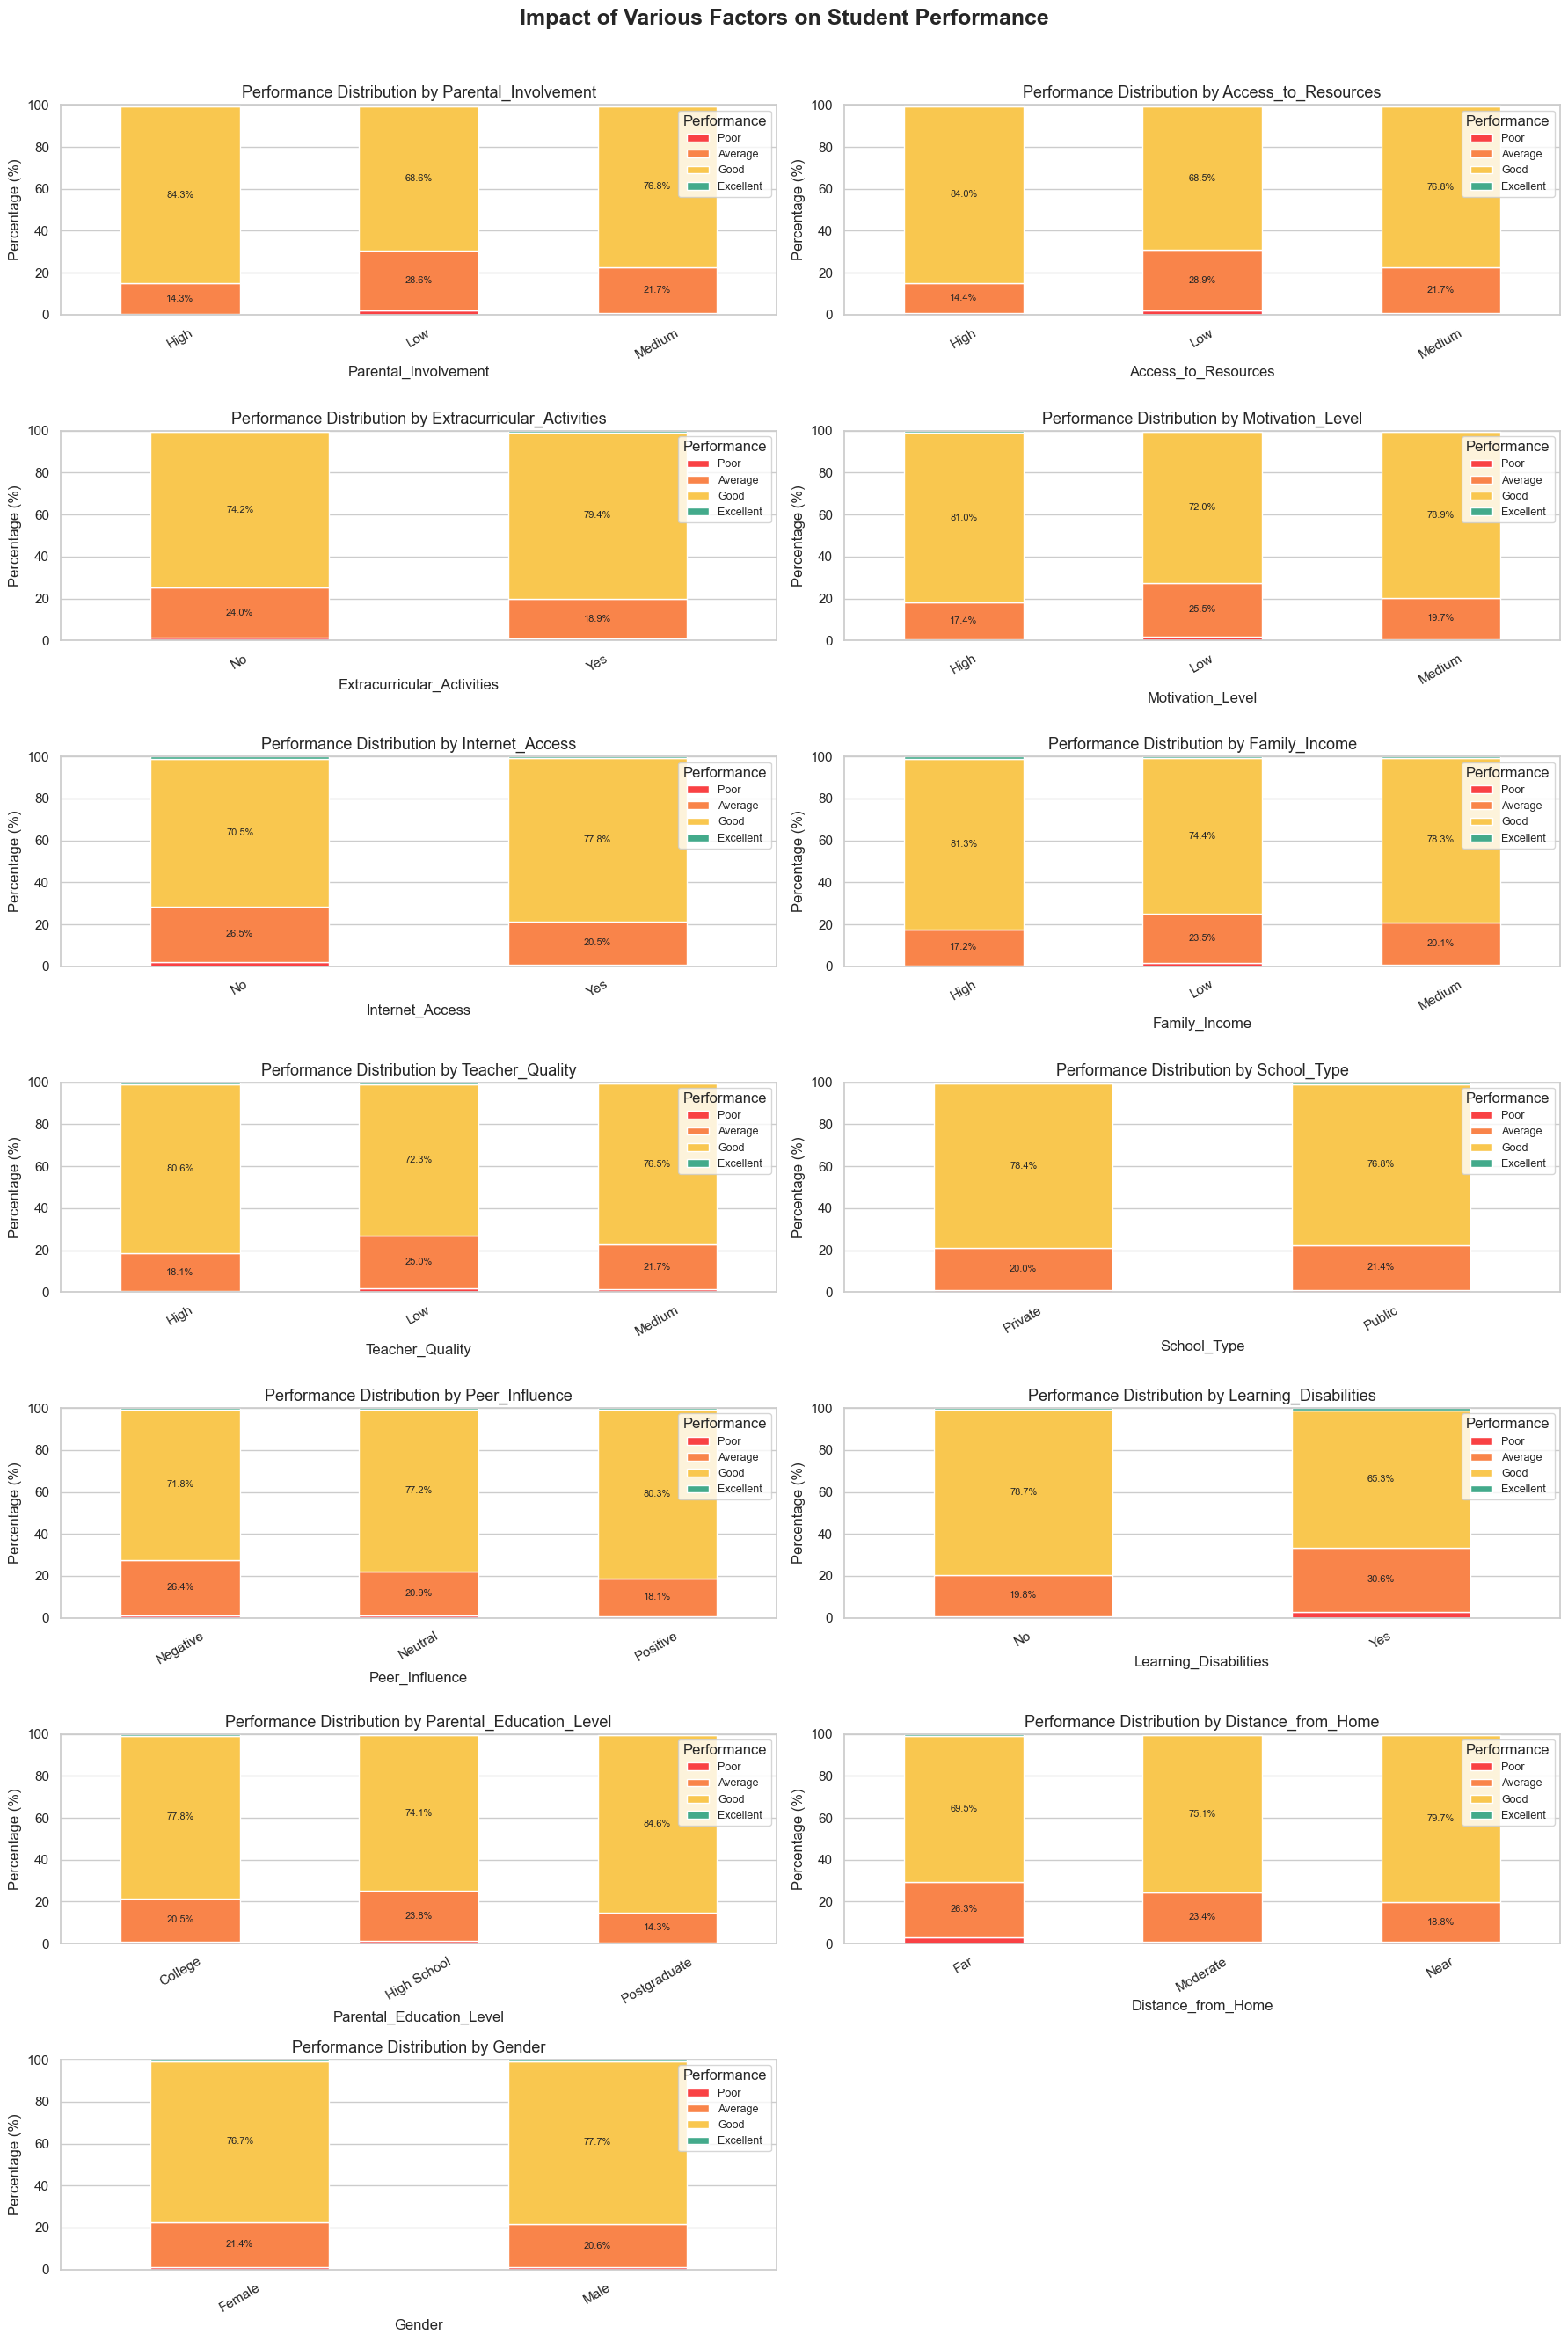

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# List of categorical columns to analyze
categorical_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access', 'Family_Income',
    'Teacher_Quality', 'School_Type', 'Peer_Influence',
    'Learning_Disabilities', 'Parental_Education_Level',
    'Distance_from_Home', 'Gender'
]

# Updated color palette with 4 categories
performance_palette = {
    'Poor': '#f94144',
    'Average': '#f9844a',
    'Good': '#f9c74f',
    'Excellent': '#43aa8b'
}

# Set up subplot
n_cols = 2
n_rows = (len(categorical_columns) + 1) // n_cols
fig, axs = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axs = axs.flatten()

# Plot loop
for i, col in enumerate(categorical_columns):
    ax = axs[i]

    # Normalize the crosstab
    crosstab = pd.crosstab(df[col], df['Performance'], normalize='index') * 100

    # Reorder columns safely (in case some values are missing in any category)
    for cat in ['Poor', 'Average', 'Good', 'Excellent']:
        if cat not in crosstab.columns:
            crosstab[cat] = 0
    crosstab = crosstab[['Poor', 'Average', 'Good', 'Excellent']]

    # Plot
    crosstab.plot(kind='bar', stacked=True, ax=ax, color=performance_palette)

    ax.set_title(f"Performance Distribution by {col}", fontsize=13)
    ax.set_ylabel("Percentage (%)")
    ax.set_xlabel(col)
    ax.legend(title="Performance", loc='upper right', fontsize=9)
    ax.set_ylim(0, 100)

    # Add % labels
    for container in ax.containers:
        labels = [f"{v.get_height():.1f}%" if v.get_height() > 5 else '' for v in container]
        ax.bar_label(container, labels=labels, label_type='center', fontsize=8)

    ax.tick_params(axis='x', rotation=30)

# Remove unused axes
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Final layout
plt.suptitle("Impact of Various Factors on Student Performance", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

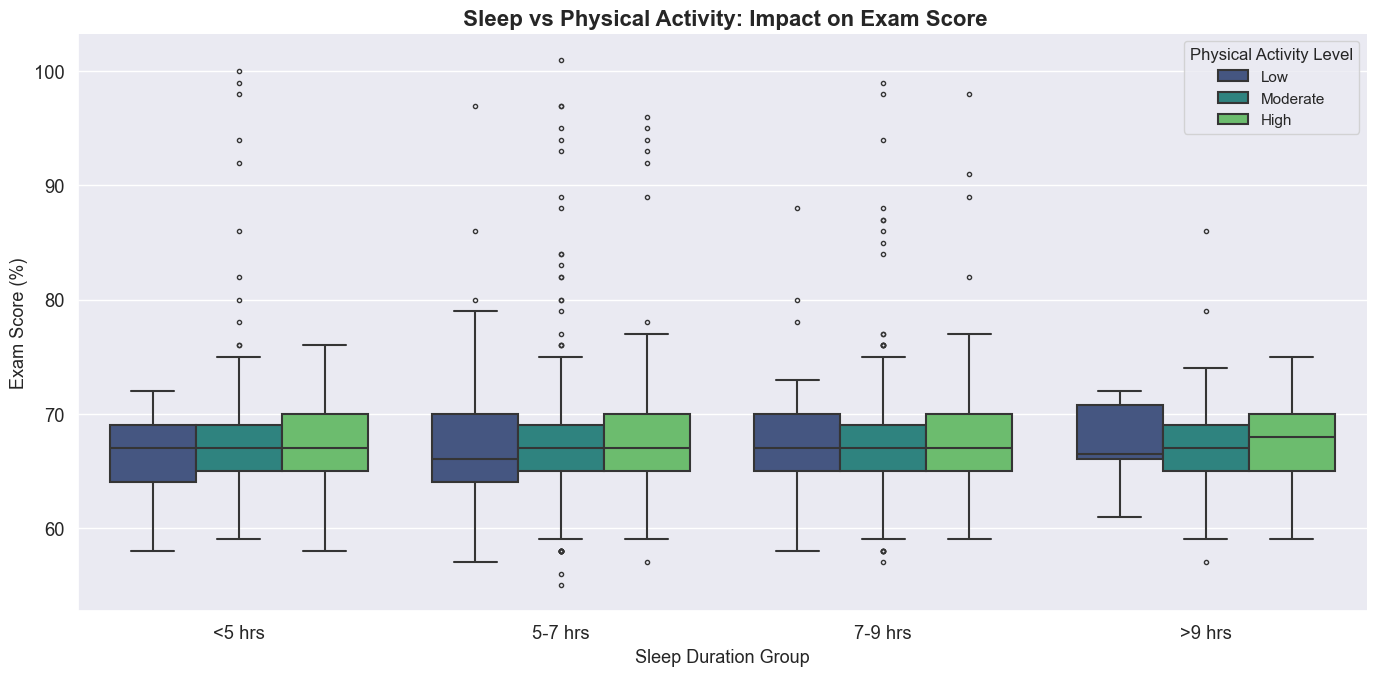

In [22]:
# Grouping Sleep Hours
df['Sleep_Hours_Group'] = pd.cut(df['Sleep_Hours'],
                                 bins=[0, 5, 7, 9, 12],
                                 labels=["<5 hrs", "5-7 hrs", "7-9 hrs", ">9 hrs"])

# Grouping Physical Activity
df['Physical_Activity_Group'] = pd.cut(df['Physical_Activity'],
                                       bins=[-1, 1, 3, 6],
                                       labels=["Low", "Moderate", "High"])

# Set plot aesthetics
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(14, 7))

# Create boxplot
ax = sns.boxplot(
    x='Sleep_Hours_Group',
    y='Exam_Score',
    hue='Physical_Activity_Group',
    data=df,
    palette='viridis',
    linewidth=1.5,
    fliersize=3
)

# Add title and labels
plt.title(' Sleep vs Physical Activity: Impact on Exam Score', fontsize=16, weight='bold')
plt.xlabel('Sleep Duration Group', fontsize=13)
plt.ylabel('Exam Score (%)', fontsize=13)

# Customize legend
plt.legend(title='Physical Activity Level', title_fontsize=12, fontsize=11, loc='upper right')

# Improve layout and add gridlines
plt.tight_layout()
sns.despine()

plt.show()

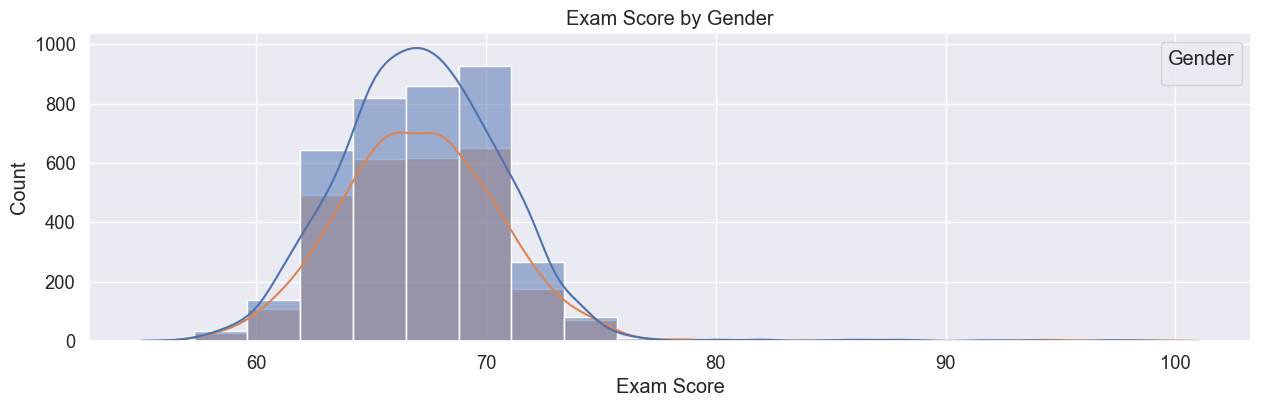

In [23]:
# Basic plot without fancy styles
# Set plot aesthetics

plt.figure(figsize=(15, 4))
sns.histplot(data=df, x='Exam_Score', hue='Gender', bins=20, kde=True)

plt.title('Exam Score by Gender')
plt.xlabel('Exam Score')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [24]:
colname=[]
for x in df.columns:
    if df[x].dtype=='object':
        colname.append(x)


In [25]:
print(colname)

['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Performance']


In [26]:
#Here we go with transform the variable into numerical form...
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    df[x]=le.fit_transform(df[x])

In [27]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Performance,Sleep_Hours_Group,Physical_Activity_Group
0,23,84,1,0,0,7,73,1,1,0,...,2,3,0,1,2,1,67,2,5-7 hrs,Moderate
1,19,64,1,2,0,8,59,1,1,2,...,0,4,0,0,1,0,61,0,7-9 hrs,High
2,24,98,2,2,1,7,91,2,1,2,...,1,4,0,2,2,1,74,2,5-7 hrs,High
3,29,89,1,2,1,8,98,2,1,1,...,0,4,0,1,1,1,71,2,7-9 hrs,High
4,19,92,2,2,1,6,65,2,1,3,...,1,4,0,0,2,0,70,2,5-7 hrs,High


In [28]:
df=df.drop(['Sleep_Hours_Group'],axis=1)

In [29]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score', 'Performance', 'Physical_Activity_Group'],
      dtype='object')

In [30]:
df.dtypes

Hours_Studied                    int64
Attendance                       int64
Parental_Involvement             int32
Access_to_Resources              int32
Extracurricular_Activities       int32
Sleep_Hours                      int64
Previous_Scores                  int64
Motivation_Level                 int32
Internet_Access                  int32
Tutoring_Sessions                int64
Family_Income                    int32
Teacher_Quality                  int32
School_Type                      int32
Peer_Influence                   int32
Physical_Activity                int64
Learning_Disabilities            int32
Parental_Education_Level         int32
Distance_from_Home               int32
Gender                           int32
Exam_Score                       int64
Performance                      int32
Physical_Activity_Group       category
dtype: object

In [31]:
print(df['Physical_Activity_Group'].value_counts())

Physical_Activity_Group
Moderate    4172
High        1968
Low          467
Name: count, dtype: int64


In [32]:
df['Physical_Activity_Group'] = np.where(df['Physical_Activity_Group']=='Moderate', 1, df['Physical_Activity_Group'])
df['Physical_Activity_Group'] = np.where(df['Physical_Activity_Group']=='Low', 0, df['Physical_Activity_Group'])
df['Physical_Activity_Group'] = np.where(df['Physical_Activity_Group']=='High', 2, df['Physical_Activity_Group'])

In [33]:
print(df['Physical_Activity_Group'].value_counts())

Physical_Activity_Group
1    4172
2    1968
0     467
Name: count, dtype: int64


array([[<Axes: title={'center': 'Hours_Studied'}>,
        <Axes: title={'center': 'Attendance'}>,
        <Axes: title={'center': 'Parental_Involvement'}>,
        <Axes: title={'center': 'Access_to_Resources'}>,
        <Axes: title={'center': 'Extracurricular_Activities'}>],
       [<Axes: title={'center': 'Sleep_Hours'}>,
        <Axes: title={'center': 'Previous_Scores'}>,
        <Axes: title={'center': 'Motivation_Level'}>,
        <Axes: title={'center': 'Internet_Access'}>,
        <Axes: title={'center': 'Tutoring_Sessions'}>],
       [<Axes: title={'center': 'Family_Income'}>,
        <Axes: title={'center': 'Teacher_Quality'}>,
        <Axes: title={'center': 'School_Type'}>,
        <Axes: title={'center': 'Peer_Influence'}>,
        <Axes: title={'center': 'Physical_Activity'}>],
       [<Axes: title={'center': 'Learning_Disabilities'}>,
        <Axes: title={'center': 'Parental_Education_Level'}>,
        <Axes: title={'center': 'Distance_from_Home'}>,
        <Axes: tit

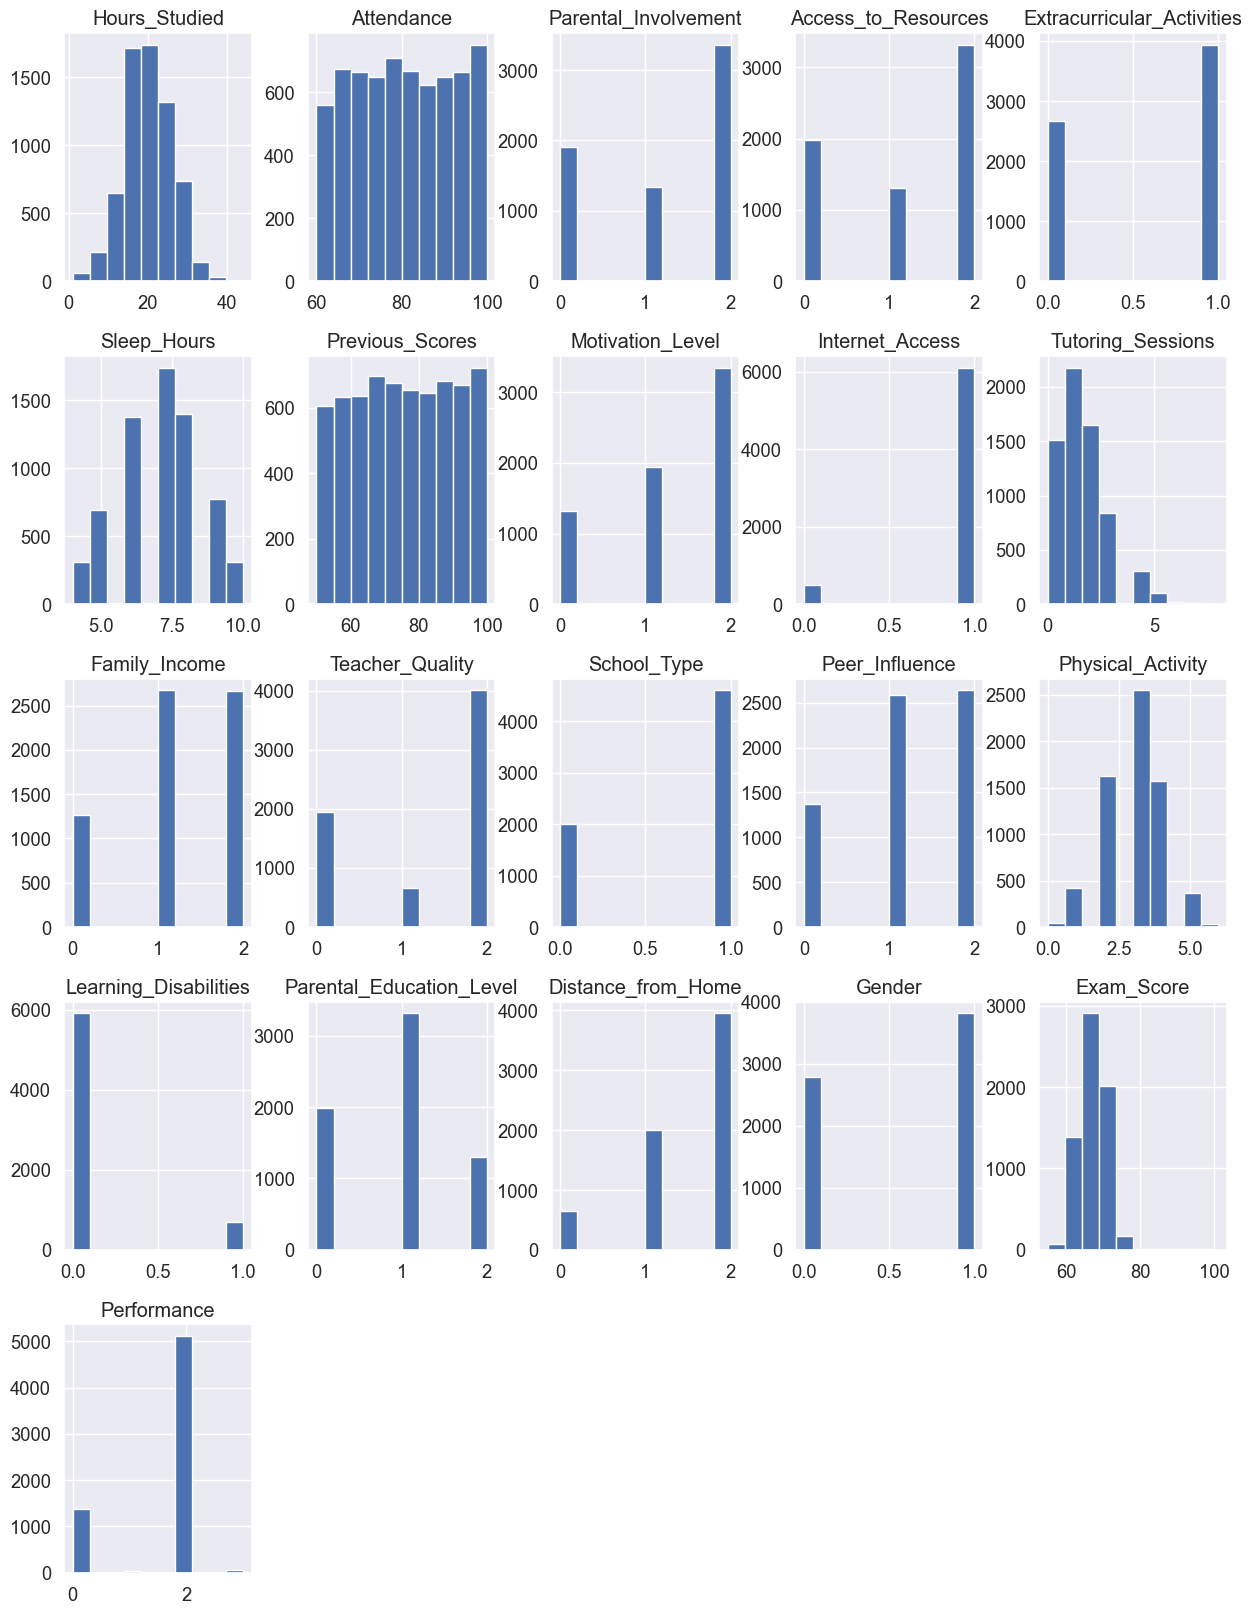

In [34]:
# Plotting histogram of all variables and check out the frequency distribution for remaining variables in the dataset
df.hist(figsize=(15,20))

In [35]:
lis=df[df.columns].corr()['Performance'][:]
print(df[df.columns].corr()['Performance'][:])

Hours_Studied                 0.301245
Attendance                    0.443648
Parental_Involvement         -0.061225
Access_to_Resources          -0.063893
Extracurricular_Activities    0.057464
Sleep_Hours                  -0.004261
Previous_Scores               0.119746
Motivation_Level             -0.003476
Internet_Access               0.035677
Tutoring_Sessions             0.112080
Family_Income                -0.010110
Teacher_Quality              -0.029196
School_Type                  -0.017360
Peer_Influence                0.069928
Physical_Activity             0.026295
Learning_Disabilities        -0.074607
Parental_Education_Level      0.038955
Distance_from_Home            0.058673
Gender                        0.010136
Exam_Score                    0.504996
Performance                   1.000000
Physical_Activity_Group       0.025807
Name: Performance, dtype: float64


In [36]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Performance,Physical_Activity_Group
Hours_Studied,1.00,-0.01,0.01,-0.01,-0.01,0.01,0.02,0.02,0.01,-0.01,0.01,0.00,0.00,0.01,0.00,-0.01,0.01,-0.01,-0.00,0.45,0.30,0.01
Attendance,-0.01,1.00,-0.00,0.00,-0.00,-0.02,-0.02,0.01,-0.02,0.01,-0.01,-0.01,-0.02,-0.01,-0.02,-0.02,0.01,0.02,0.01,0.58,0.44,-0.02
Parental_Involvement,0.01,-0.00,1.00,0.01,0.02,0.00,0.01,-0.01,0.00,-0.01,0.01,-0.00,-0.00,-0.01,0.01,-0.01,0.02,-0.00,0.02,-0.09,-0.06,0.01
Access_to_Resources,-0.01,0.00,0.01,1.00,-0.01,-0.00,-0.00,-0.01,0.00,0.01,0.01,0.01,0.03,0.01,0.04,0.00,-0.01,0.02,0.01,-0.09,-0.06,0.04
Extracurricular_Activities,-0.01,-0.00,0.02,-0.01,1.00,0.00,0.00,-0.01,-0.01,0.00,0.02,-0.00,0.01,0.01,-0.00,-0.01,-0.01,-0.01,0.01,0.06,0.06,0.00
Sleep_Hours,0.01,-0.02,0.00,-0.00,0.00,1.00,-0.02,0.00,0.01,-0.01,0.01,-0.01,0.00,-0.02,-0.00,0.02,-0.00,0.00,-0.01,-0.02,-0.00,-0.01
Previous_Scores,0.02,-0.02,0.01,-0.00,0.00,-0.02,1.00,-0.02,0.00,-0.01,0.01,-0.02,0.01,-0.02,-0.01,0.01,0.01,0.01,0.00,0.18,0.12,-0.01
Motivation_Level,0.02,0.01,-0.01,-0.01,-0.01,0.00,-0.02,1.00,0.00,-0.01,-0.01,0.01,-0.01,0.00,-0.00,-0.02,0.02,0.01,0.00,-0.01,-0.00,-0.00
Internet_Access,0.01,-0.02,0.00,0.00,-0.01,0.01,0.00,0.00,1.00,-0.01,0.02,-0.00,0.01,-0.01,-0.01,0.01,0.02,-0.01,0.02,0.05,0.04,-0.01
Tutoring_Sessions,-0.01,0.01,-0.01,0.01,0.00,-0.01,-0.01,-0.01,-0.01,1.00,-0.00,-0.00,0.01,-0.01,0.02,0.01,-0.00,0.02,-0.01,0.16,0.11,0.02


Text(0.5, 1.0, 'Sleep_Hours')

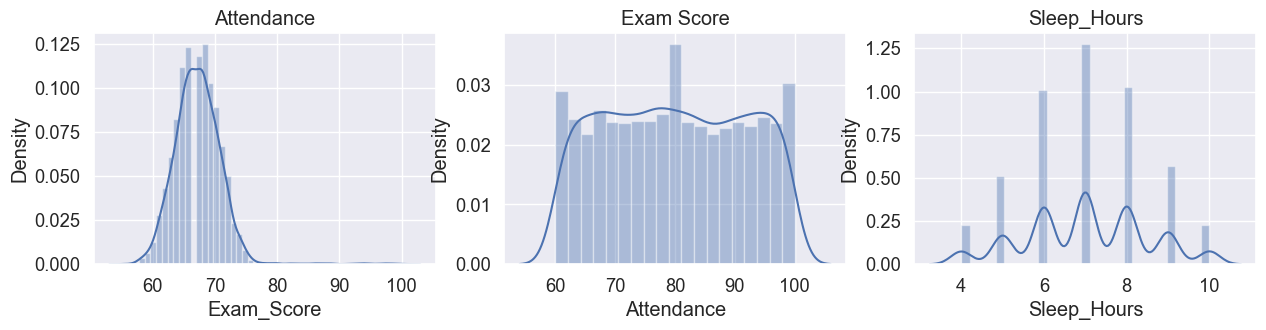

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(df['Exam_Score'],ax=ax[0])
sns.distplot(df['Attendance'], ax=ax[1])
sns.distplot(df['Sleep_Hours'], ax=ax[2])


ax[1].set_title("Exam Score")
ax[0].set_title("Attendance")
ax[2].set_title("Sleep_Hours")

In [38]:
X=df.iloc[:,0:-1].values
Y=df.iloc[:,-1].values

In [39]:
print(X.shape)
print(Y.shape)

(6607, 21)
(6607,)


([<matplotlib.axis.XTick at 0x1e749766bd0>,
 [Text(0, 0, '2'), Text(1, 0, '0'), Text(2, 0, '3'), Text(3, 0, '1')])

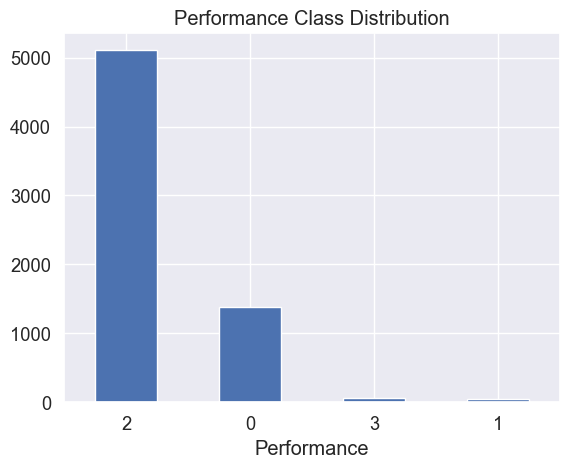

In [40]:
count_classes = pd.value_counts(df['Performance'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Performance Class Distribution")

plt.xticks(range(4))


In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [42]:
X=scaler.transform(X)
print(X)

[[ 0.50494151  0.34837541 -0.25424875 ...  0.85574648 -0.06057825
   0.50346849]
 [-0.16282241 -1.38373605 -0.25424875 ... -1.16857039 -1.60293072
  -1.91750407]
 [ 0.67188249  1.56085343  0.90106177 ...  0.85574648  1.73883298
   0.50346849]
 ...
 [ 0.00411857  0.86800885  0.90106177 ... -1.16857039  0.1964805
   0.50346849]
 [-1.66529123  0.52158655 -1.40955928 ... -1.16857039  0.1964805
   0.50346849]
 [-0.83058633 -1.12391933  0.90106177 ...  0.85574648 -0.83175448
  -1.91750407]]


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.20, random_state=10)

In [44]:
Y_train = Y_train.astype(int)
Y_val = Y_val.astype(int)

In [45]:
#prediction using decision tree classfier
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                                          max_features=None, max_leaf_nodes=None,
                                          min_impurity_decrease=1e-07, min_samples_leaf=1,
                                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                                          random_state=None, splitter='best')
#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_val)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cfm=confusion_matrix(Y_val,Y_pred)
print(cfm)

print("Classification_Report")
print(classification_report(Y_val,Y_pred))

acc=accuracy_score(Y_val,Y_pred)
print("Accuracy of the model : ",acc)

[[ 99   0   0]
 [  0 834   0]
 [  0   0 389]]
Classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       834
           2       1.00      1.00      1.00       389

    accuracy                           1.00      1322
   macro avg       1.00      1.00      1.00      1322
weighted avg       1.00      1.00      1.00      1322

Accuracy of the model :  1.0


In [47]:
#predicting using the Random_Forest_Classifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForest=RandomForestClassifier(n_estimators=30, random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_val)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cfm=confusion_matrix(Y_val,Y_pred)
print(cfm)

print("Classification_Report")
print(classification_report(Y_val,Y_pred))

acc=accuracy_score(Y_val,Y_pred)
print("Accuracy of the model : ",acc)

[[ 99   0   0]
 [  0 834   0]
 [  0   0 389]]
Classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       834
           2       1.00      1.00      1.00       389

    accuracy                           1.00      1322
   macro avg       1.00      1.00      1.00      1322
weighted avg       1.00      1.00      1.00      1322

Accuracy of the model :  1.0


In [49]:
from sklearn.linear_model import LogisticRegression
classfier=LogisticRegression(solver='liblinear', C=10.0, random_state=0,dual=False)
classfier.fit(X_train,Y_train)

Y_pred=classfier.predict(X_val)

print([(int(yv), int(yp)) for yv, yp in zip(Y_val, Y_pred)])

[(1, 1), (1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2), (2, 2), (1, 1), (1, 1), (2, 2), (2, 2), (1, 1), (2, 2), (2, 2), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (2, 2), (2, 2), (1, 1), (2, 2), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2), (1, 1), (2, 2), (2, 2), (1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (0, 0), (1, 1), (2, 2), (1, 1), (2, 2), (1, 1), (2, 2), (2, 2), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (2, 2), (2, 2), (0, 0), (0, 0), (2, 2), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (2, 2), (1, 1), (1, 1), (2, 2), (1, 1), (2, 2), (1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (2, 2), (1, 1), (1, 1), (2, 2), (1, 1), (2, 2), (2, 2), (1, 1), (2, 2), (1, 1),

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_val,Y_pred)
print(cfm)
print("classification report: ")
print(classification_report(Y_val,Y_pred))

acc=accuracy_score(Y_val,Y_pred)
print("Accuracy of the model: ",acc)

[[ 99   0   0]
 [  0 834   0]
 [  0   0 389]]
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       834
           2       1.00      1.00      1.00       389

    accuracy                           1.00      1322
   macro avg       1.00      1.00      1.00      1322
weighted avg       1.00      1.00      1.00      1322

Accuracy of the model:  1.0


In [122]:
from sklearn.ensemble import RandomForestClassifier  # or any other model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import joblib

# Example dataset
data = load_iris()
X = data.data
Y = data.target

# Split dataset
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = model.predict(X_val)

# Save the model to a .pkl file
joblib.dump(model, "my_model.pkl")
print("✅ Model saved as 'my_model.pkl'")

✅ Model saved as 'my_model.pkl'
